In [1]:
import numpy as np
import math
from math import factorial as fact
import random 
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Importing all the essential libraries

In [2]:
def choose(n,k):

  # This is the function definition of nCk or "n choose k" in combinatorics

  if (n<k or n<0):
    return 0
  elif (n == k and n==0):
    return 1
  else:
    result = int(fact(n)//(fact(n-k)*fact(k)))
    return result


In [3]:
def bins_restrict(n, b, r):
  
  # This function calculates the solution to x_1 + x_2 + ... + x_b = n, with the restriction that each bin contains atmost r elements 

  # n: Number of balls
  # b: Number of bins
  # r: Restriction on the bins 

  # This formula has been taken from the site: https://www.mathpages.com/home/kmath337/kmath337.htm , it also has a generalization for different capacities for different bins. 

  #print("Balls: ", n)
  #print("Bins: ", b)
  #print("Restrict: ", r)
  if (n==b and n==0):
    return 1
    # The above formula says that if there are 0 bins and 0 balls, then there is only 1 way to satisfy the constraint 
  
  elif (n<0):
    return 0

  else: 
    it = 0
    result = 0

    for it in range(0, b+1):
      temp = ((-1)**it)*choose(b, it)*choose(n - it*(r+1) + b - 1, b - 1)
      # temp = ((-1)**it)*choose(b, it)*choose(n - it*(r+1) + b - 1, b - it*(r+1))
      #print("The temp value is: ", temp)
      #print("The RESULT value is: ", result+ temp)
      result = result + temp

    return result

In [4]:
def general_ballsbins_calc(n, b, r):
  # This formula is for the general form n = m*r + j where m>=2 and j < r. The general idea for this is Principle of Inclusion and Exclusion (P.I.E) 
  # using the bins_restrict function defined above.

  m = int(n//r)
  j = n - m*r
  # print(m)
  # print(j)
  
  if(b <= m and n != b*r):
    print("Not enough bins to fill with the restriction\n")
  elif(b > (m-1)*r + j + 1):
    print("Too many bins to fill with the restriction\n")
  else:
    result = 0
    it = 0
    for it in range(m):
      count = it + 1

      # if(n-count*r < b - count)
      new_balls = n - count*r - (b - count)
      new_bins = b - count
      new_restrict = r-1
      fill = bins_restrict(new_balls, new_bins, new_restrict)
      # print(fill)
      # print("That term: ")
      # print(((-1)**it)*(choose(b, count))*fill)
      result = result + ((-1)**it)*(choose(b, count))*fill
      # print("The result for the iteration", it, "is: ", ((-1)**it)*(choose(b, count))*fill)
    
    return result

In [5]:
def average_bins(n, r):
  m = int(n//r)
  j = n - m*r

  sz = (m-1)*k + j + 1 - m
  x = np.zeros(sz, dtype = "int")
  y = np.zeros(sz, dtype = "int")

  for it in range(1, sz+1):
    x[it] = m + it

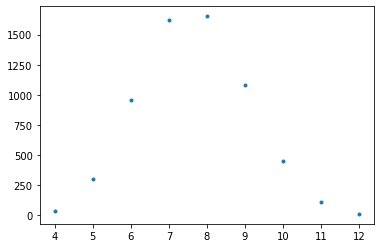

The average number of bins are:  7.643604183427192  bins.
The total number of bins are:  9  bins.
8.0


In [28]:
m = 3
j = 1
r = 5
n = m*r + j

sz = (m-1)*r + j + 1 - m
x = np.zeros(sz,dtype=np.object)
y = np.zeros(sz,dtype=np.object)
z = np.zeros(sz,dtype=np.object)
symm = np.zeros(sz,dtype=np.object)
arr = []

maxi = 0
sum = 0
w_sum = 0

for it in range(0, sz):
  x[it] = int(m + 1 + it)

for it in range(0, sz):
  bins = m + 1 + it
  count = general_ballsbins_calc(n, bins, r)
  y[it] = count
  maxi = max(maxi, count)
  sum = sum + count
  w_sum = w_sum + x[it]*count
  z[it] = math.log10(count)

  if(it<=(sz+1)/2):
    symm[it] = count
    symm[sz -1 - it] = count

  for jt in range(0, count):
    arr.append(bins)




#for it in range(0, sz):
 # y[it] = y[it]/maxi


plt.plot(x, y, 'o', markersize=3)
plt.show()

avg = w_sum/sum

print("The average number of bins are: ", avg, " bins.")
print("The total number of bins are: ", sz, " bins.")
print((x[0]+x[sz-1])/2)





In [26]:
y.shape

(9,)

In [8]:
34 + 300 + 960 + 1617

2911

In [9]:
Y_a = np.array(arr, dtype = np.int)
Y_a

array([ 4,  4,  4, ..., 12, 12, 12])

In [11]:
av = np.mean(arr, dtype = np.float64)
print(av)

sd = np.std(arr, dtype = np.float64)
print(sd)

var = np.var(arr, dtype = np.float64)
print(var)

7.643604183427192
1.3880065094226741
1.9265620701997157


In [13]:
k = (av*av)/var
beta = av/var

print(k, beta)

30.32587727985796 3.9674839973543254


In [14]:
import scipy.stats as stats    
alpha = 5
loc = 100.5
beta = 22
data = stats.gamma.rvs(alpha, loc=loc, scale=beta, size=10000)    
print(data)

[183.14257167 153.8723256  288.14318078 ... 146.75120926 243.83624698
 224.53160267]


In [15]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(arr)

In [16]:
print(fit_alpha, fit_loc, fit_beta)

197.82386426202777 -11.883542985189699 0.09870763461019308


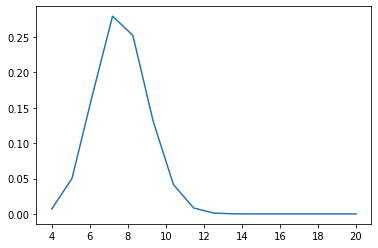

ValueError: ignored

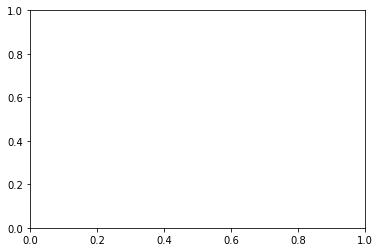

In [20]:
from matplotlib import pyplot as plt

x = np.linspace (4, 20, 16) 
y1 = stats.gamma.pdf(x, a=fit_alpha, loc = fit_loc, scale=fit_beta) #a is alpha, loc is beta???
plt.plot(x, y1) 

plt.show()

plt.plot(x, y, 'o', markersize=2)
plt.show()

In [23]:
bins_restrict(10, 8, 3)

bins_restrict(2, 8, 2) - bins_restrict(2, 8, 1)

8

In [ ]:
!pip install fitter

  Created wheel for fitter: filename=fitter-1.2.1-cp36-none-any.whl size=22008 sha256=2670f50b62f978ce8070ae486e60204964af870429491317dd561d080e37ee5a
  Stored in directory: /root/.cache/pip/wheels/53/3a/55/e36b00733683c71d53430f6f4db91af4c727ba4339b1e654e6
Successfully built fitter


In [ ]:
data = np.array(arr, dtype = np.int64)
data

array([ 4,  4,  4, ..., 19, 19, 19])

In [ ]:
from fitter import Fitter
f = Fitter(arr)
f.fit()
f.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:422: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:708: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:712: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=5.5453719851429035)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)


KeyboardInterrupt: ignored

In [ ]:
d = [1, 2, 3]
d.append(5)
d

In [ ]:
k2, p = stats.normaltest(arr)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

In [ ]:
data = np.array(y, dtype = float)
data

In [ ]:
!pip install reliability

In [ ]:
from reliability.Fitters import Fit_Everything


In [ ]:
from reliability.Fitters import Fit_Everything
results = Fit_Everything(failures=arr, show_histogram_plot=True, show_probability_plot=False, show_PP_plot=False)
print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)